___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [118]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns  # Seaborn for enhanced data visualization

# Suppress warning messages to improve code readability
import warnings
warnings.filterwarnings("ignore")

# Display a warning message that will not be shown
warnings.warn("this will not show")

# Configure the default figure size for plots
plt.rcParams["figure.figsize"] = (10, 6)

# Set the style for Seaborn plots to 'whitegrid'
sns.set_style("whitegrid")

# Format display of floating-point numbers to three decimal places
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Display all columns when viewing DataFrames
pd.set_option("display.max_columns", None)


In [119]:

# Import TensorFlow library for deep learning and machine learning tasks
import tensorflow as tf

# List and display available physical devices (e.g., GPUs)
tf.config.list_physical_devices("GPU")


[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [120]:
# Import the Fashion MNIST dataset from TensorFlow's Keras datasets
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


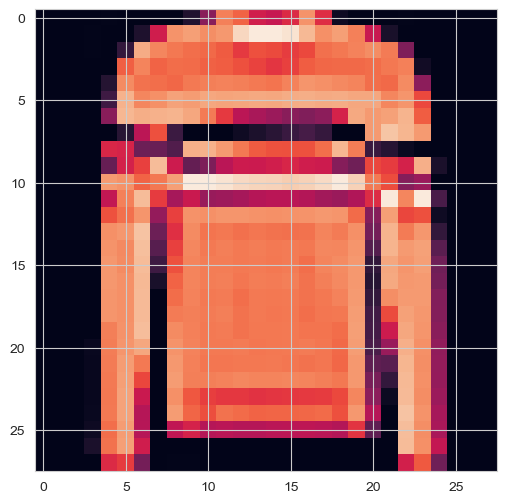

In [121]:
# Display an image from the training dataset at index 5 using Matplotlib
plt.imshow(x_train[5])


In [122]:
# Access the label associated with the training sample at index 5
y_train[5]


2

In [123]:
x_train.shape

(60000, 28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [124]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

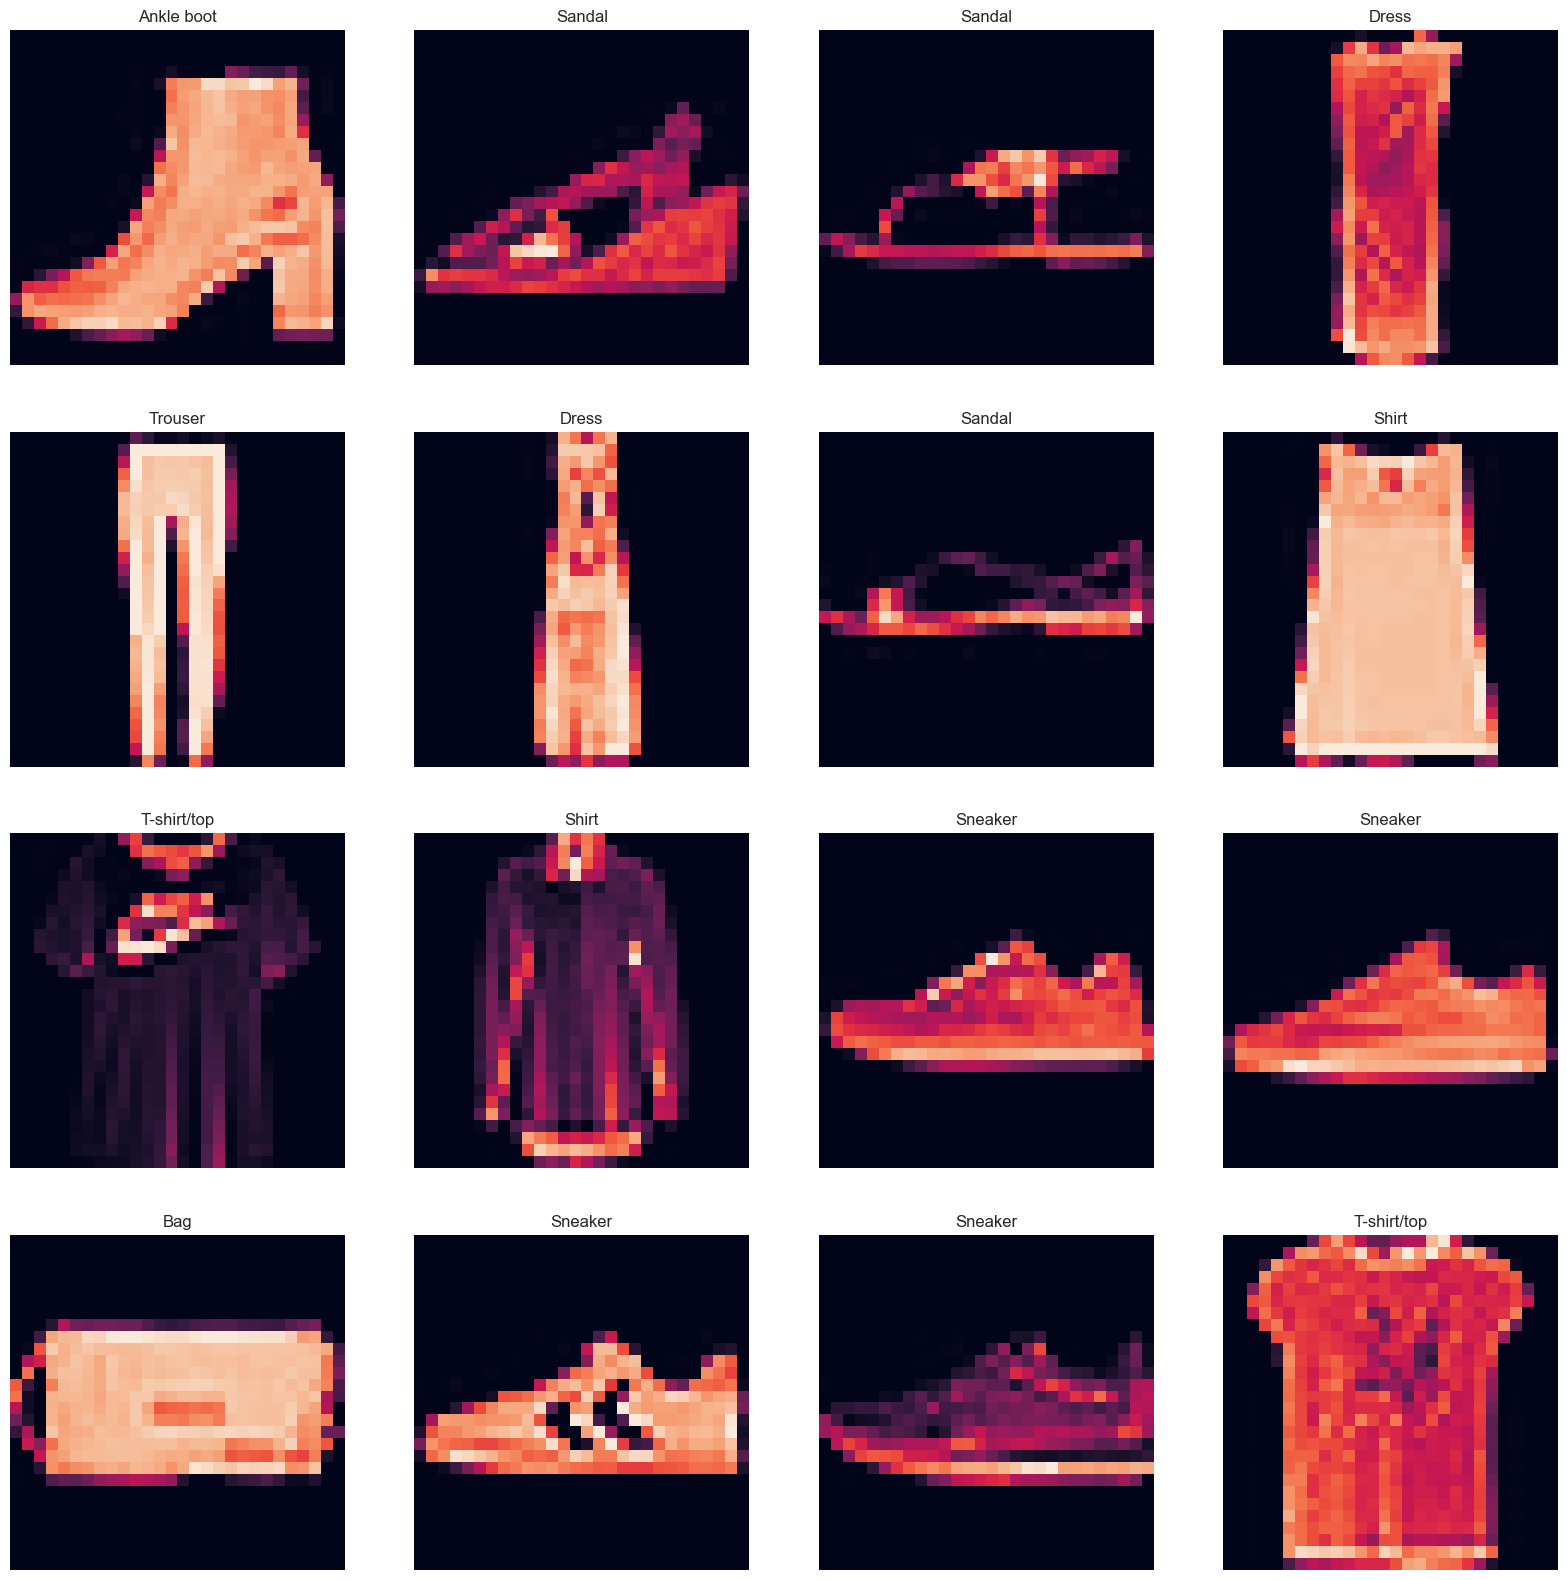

In [125]:
# Create a large figure to display a grid of images (4x4)
plt.figure(figsize=(20, 20))

# Loop to display a random selection of 16 images with their labels
for i in range(16):
    # Generate a random index for selecting a sample from the training dataset
    rand_index = int(np.random.randint(low=0, high=60000, size=1))

    # Create a subplot within the grid (4x4 grid)
    plt.subplot(4, 4, i+1)

    # Turn off axis labels for a clean display
    plt.axis("off")

    # Display the label as the title for each image (using the classes array)
    plt.title(classes[int(y_train[rand_index])])

    # Display the image corresponding to the randomly selected index
    plt.imshow(x_train[rand_index])


# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [126]:
x_train[3].min()

0

In [127]:
x_train[3].max()

255

In [128]:
# Convert the data type of x_train and x_test to float for numerical operations
x_train = x_train.astype("float")
x_test = x_test.astype("float")

# Normalize pixel values by dividing by 255 to scale them between 0 and 1
x_train = x_train / 255
x_test = x_test / 255


In [129]:
x_train[3].min()

0.0

In [130]:
x_train[3].max()

1.0

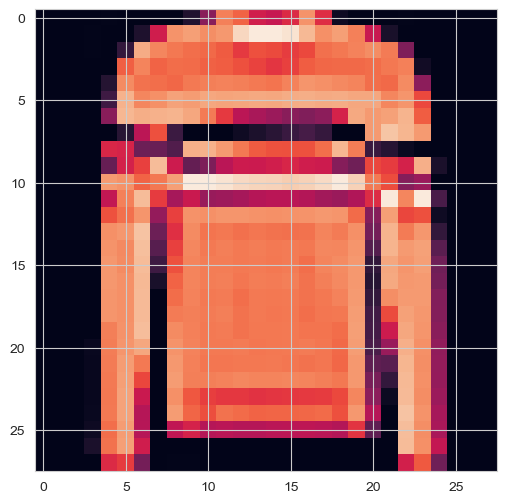

In [131]:
plt.imshow(x_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [132]:
x_train.shape

(60000, 28, 28)

In [133]:
x_test.shape

(10000, 28, 28)

In [134]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [135]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [136]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [141]:
# Create a sequential model to define the neural network architecture
model = Sequential()

# Add a 2D convolutional layer with 28 filters and a 3x3 kernel, using ReLU activation
model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))

# Add a max-pooling layer with a pool size of (2, 2) and strides of (1, 1)
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

# Flatten the output of the previous layers to prepare for dense layers
model.add(Flatten())

# Add a dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation="relu"))

# Add the final dense layer with 10 neurons and softmax activation for multi-class classification
model.add(Dense(10, activation="softmax"))

# Compile the model with categorical cross-entropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])


In [142]:

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 17500)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               2240128   
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [143]:
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
# Create an EarlyStopping callback to monitor validation accuracy
early_stop = EarlyStopping(
    monitor="val_accuracy",  # Monitor validation accuracy
    mode="max",              # Monitor for maximum accuracy improvement
    patience=2,              # Stop training if no improvement for 2 consecutive epochs
    restore_best_weights=True  # Restore the model's best weights when stopping
)


In [145]:
# Train the model using the training data and labels
model.fit(
    x_train,             # Input data
    y_train,             # Target labels
    batch_size=64,       # Number of samples per batch during training
    epochs=10,           # Number of training epochs
    validation_data=(x_test, y_test),  # Validation data and labels
    callbacks=[early_stop]  # List of callbacks to monitor and control training
)


Epoch 1/10
938/938 [==============================] - 44s 47ms/step - loss: 0.3984 - accuracy: 0.8600 - val_loss: 0.3164 - val_accuracy: 0.8895
Epoch 2/10
938/938 [==============================] - 48s 51ms/step - loss: 0.2650 - accuracy: 0.9049 - val_loss: 0.2699 - val_accuracy: 0.9005
Epoch 3/10
938/938 [==============================] - 50s 54ms/step - loss: 0.2206 - accuracy: 0.9201 - val_loss: 0.2759 - val_accuracy: 0.9030
Epoch 4/10
938/938 [==============================] - 53s 56ms/step - loss: 0.1891 - accuracy: 0.9309 - val_loss: 0.2646 - val_accuracy: 0.9067
Epoch 5/10
938/938 [==============================] - 62s 66ms/step - loss: 0.1624 - accuracy: 0.9402 - val_loss: 0.2828 - val_accuracy: 0.9044
Epoch 6/10
938/938 [==============================] - 66s 70ms/step - loss: 0.1413 - accuracy: 0.9489 - val_loss: 0.2708 - val_accuracy: 0.9095
Epoch 7/10
938/938 [==============================] - 65s 69ms/step - loss: 0.1207 - accuracy: 0.9564 - val_loss: 0.2732 - val_accuracy:

**TASK 7: Plot values of metrics you used in your model.**

In [93]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.400,0.857,0.407,0.847
1,0.260,0.906,0.292,0.895
2,0.215,0.921,0.289,0.899
3,0.184,0.933,0.282,0.903
4,0.159,0.942,0.270,0.907
5,0.137,0.950,0.269,0.910
6,0.118,0.957,0.327,0.902
7,0.103,0.963,0.308,0.910
8,0.090,0.966,0.288,0.920
9,0.079,0.972,0.301,0.921


<Axes: >

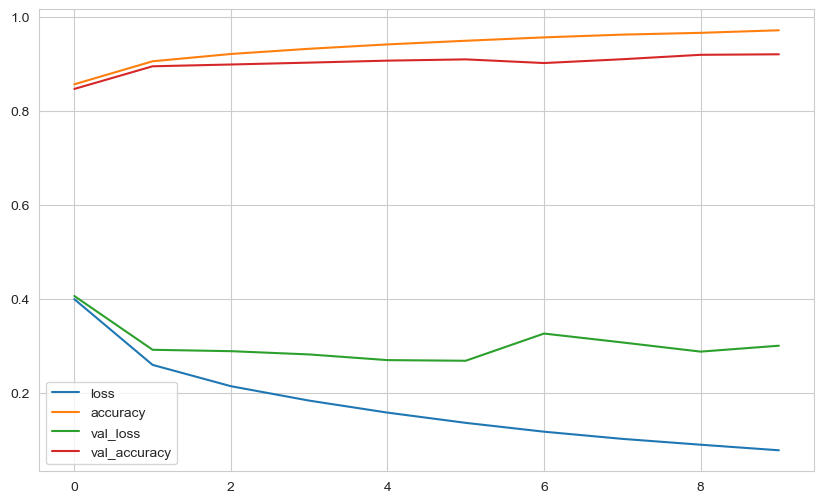

In [94]:
summary.plot()

<Axes: >

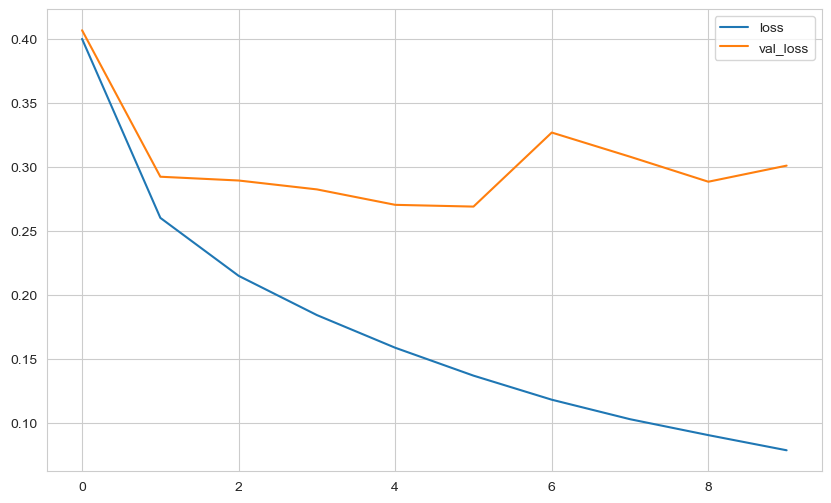

In [95]:

summary[["loss", "val_loss"]].plot()

<Axes: >

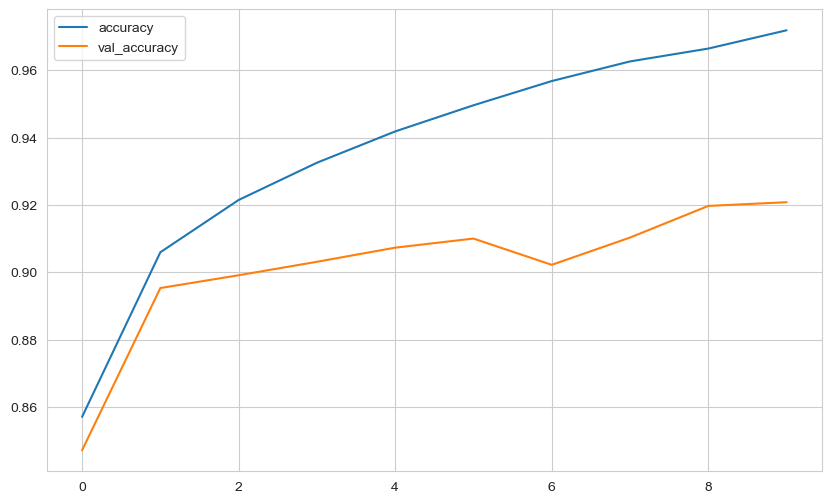

In [96]:
summary[["accuracy", "val_accuracy"]].plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [98]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3010 - accuracy: 0.9208


[0.3009694218635559, 0.920799970626831]

In [100]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy", score[1])

Test loss:  0.3009694218635559
Test accuracy 0.920799970626831


In [102]:
pred_prob = model.predict(x_test)
y_pred = np.argmax(pred_prob, axis=1)

313/313 [==============================] - 2s 7ms/step


In [103]:
pred_prob.shape

(10000, 10)

In [104]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [105]:
y_test_arg=np.argmax(y_test,axis=1)

In [107]:
Y_pred = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 2s 8ms/step


In [108]:
print(confusion_matrix(y_test_arg, Y_pred))

[[905   0  14  11   3   1  63   0   3   0]
 [  2 982   0  10   2   0   2   0   2   0]
 [ 19   0 866   6  51   0  57   0   1   0]
 [ 13   3  11 944   8   0  21   0   0   0]
 [  2   1  43  40 874   1  38   0   1   0]
 [  0   0   0   0   0 974   0  16   0  10]
 [134   0  41  21  58   0 741   0   5   0]
 [  0   0   0   0   0   6   0 968   0  26]
 [  4   0   0   6   0   2   7   2 979   0]
 [  1   0   0   0   0   5   0  19   0 975]]


In [109]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.89      0.87      0.88      1000
           3       0.91      0.94      0.93      1000
           4       0.88      0.87      0.88      1000
           5       0.98      0.97      0.98      1000
           6       0.80      0.74      0.77      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



<Axes: >

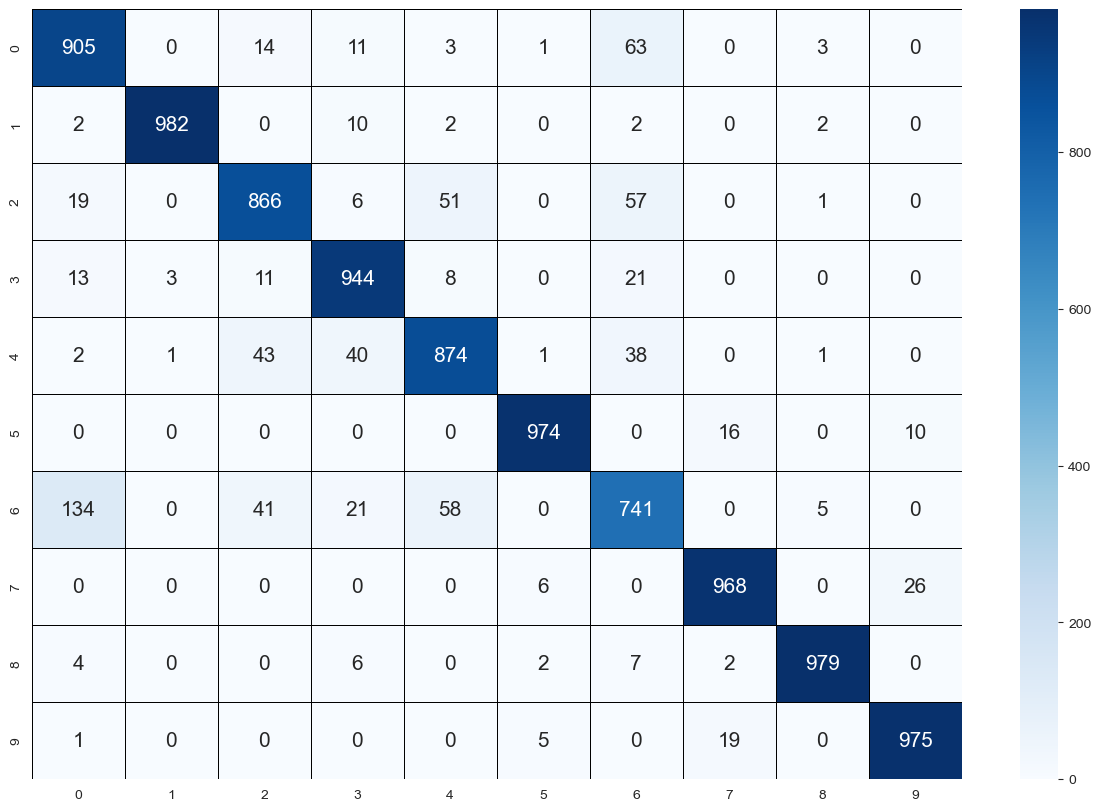

In [110]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test_arg, Y_pred), 
            annot=True, cmap="Blues", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size" : 15})

In [111]:
(y_test_arg != Y_pred).sum()

792

## Prediction

In [112]:
model.save("cnn-1.h5")

In [113]:
model = tf.keras.models.load_model("cnn-1.h5")

In [115]:
pred = model.predict(np.expand_dims(x_test[24], axis=0))
np.argmax(pred)

1/1 [==============================] - 0s 64ms/step


1

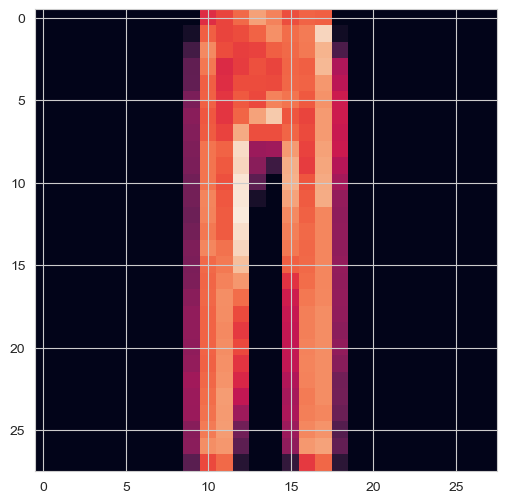

In [117]:
plt.imshow(x_test[24].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___